In [ ]:
#!pip install pycaret

# This is a real dataset of house prices sold in Seattle, Washing, USA between August and December 2022. The task is to predict the house price in this area based on several features, which are described below.

## Imports

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pycaret   
from pycaret.regression import *

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Analysis

In [3]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [4]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [6]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [7]:
train.describe(include=['O'])

,size_units,lot_size_units
count,2016,1669
unique,1,2
top,sqft,sqft
freq,2016,1449


## Converting acre to sqft

In [8]:
def sqft(row):
    if row['lot_size_units'] == 'acre':
        return row['lot_size'] * 43560
    else:
        return row['lot_size']

In [9]:
train['lot_size'] = train.apply(sqft, axis=1)
test['lot_size'] = test.apply(sqft, axis=1)

In [10]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


## Beds

<AxesSubplot:>

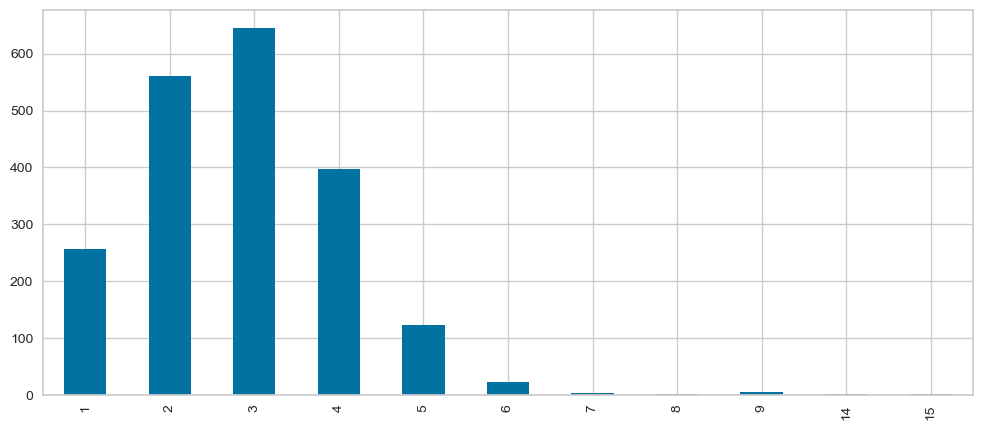

In [11]:
bedsx = train['beds'].value_counts().sort_index(ascending = True)
plt.figure(figsize=(12,5))
bedsx.plot.bar()

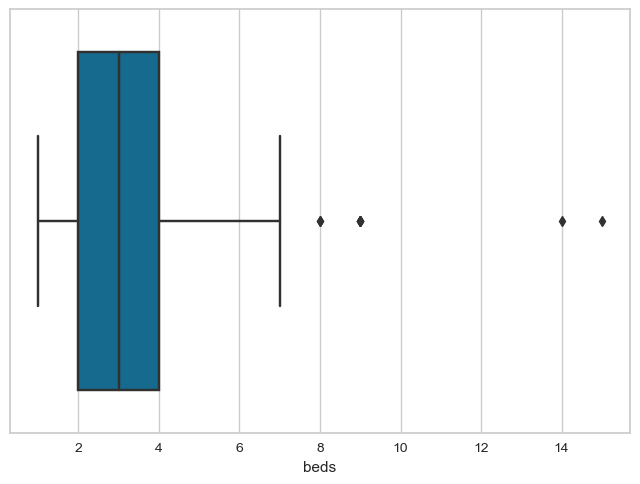

In [12]:
sns.boxplot(x="beds", data=train)
plt.show()

## Beds x Price

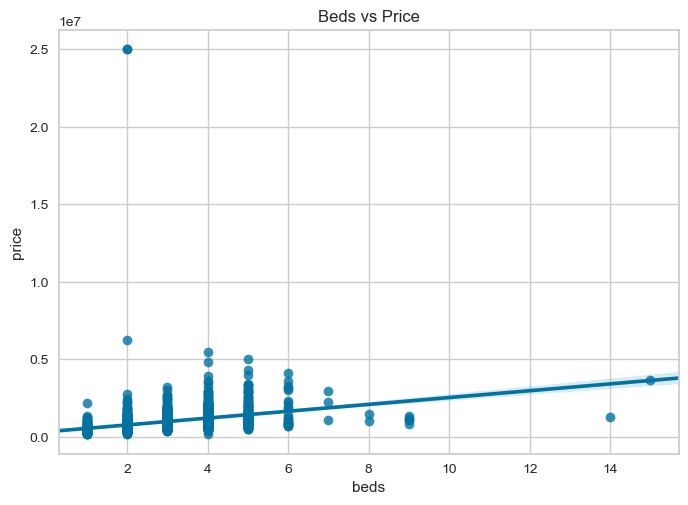

In [13]:
sns.regplot(data=train, x='beds',y='price')
plt.title('Beds vs Price')
plt.show()

## Baths

<AxesSubplot:>

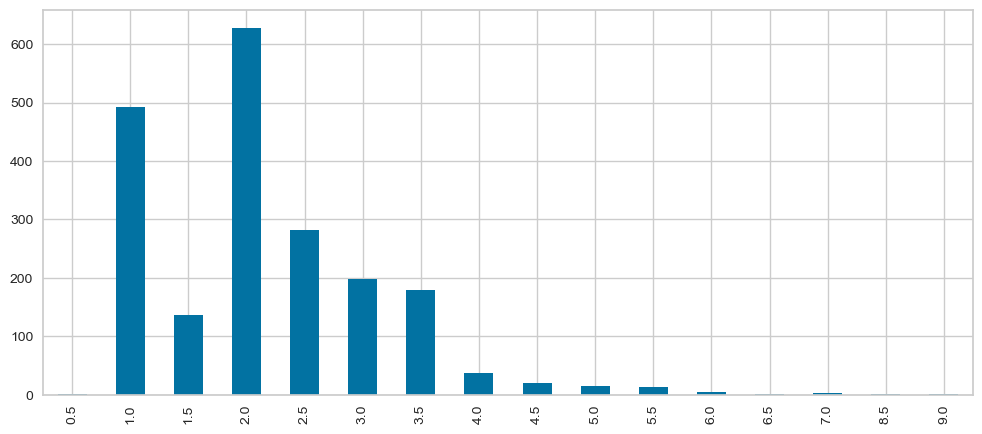

In [14]:
bathsx = train['baths'].value_counts().sort_index(ascending = True)
plt.figure(figsize=(12,5))
bathsx.plot.bar()

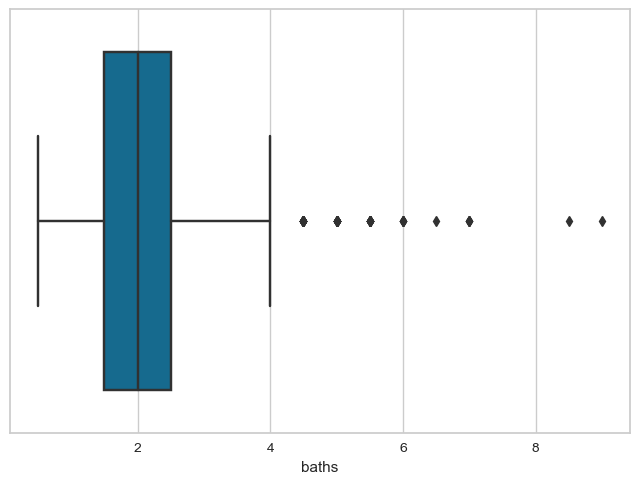

In [15]:
sns.boxplot(x="baths", data=train)
plt.show()

## Baths x Pruce

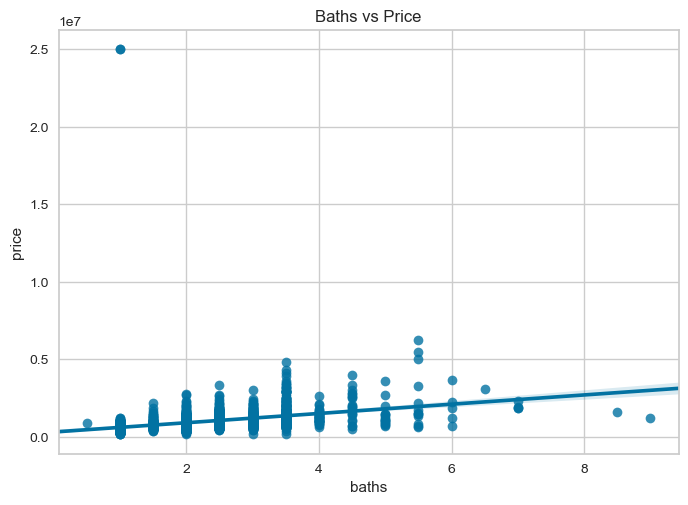

In [16]:
sns.regplot(data=train, x='baths',y='price')
plt.title('Baths vs Price')
plt.show()

## Relationship between Columns

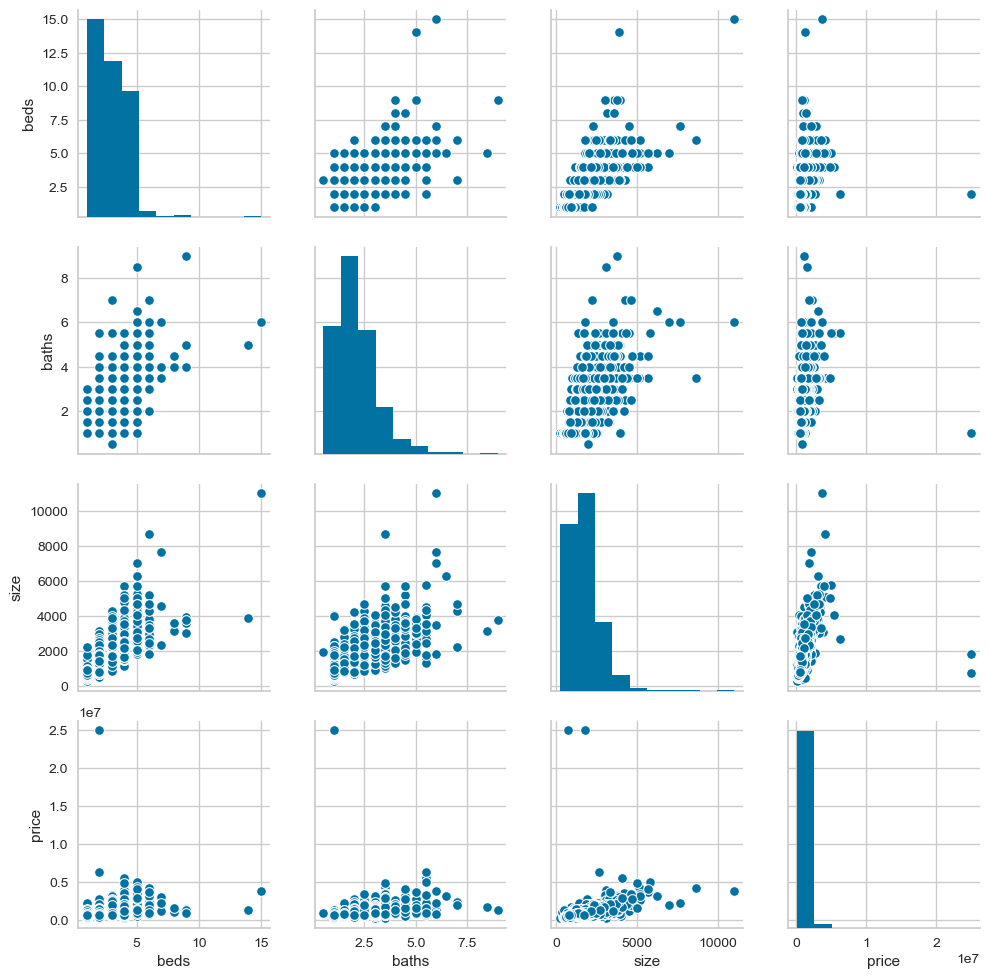

In [17]:
sns.pairplot(train[['beds','baths','size', 'price']])
plt.show()

## Start autoML

In [18]:
train = train.drop(['size_units','lot_size', 'lot_size_units', 'zip_code'],axis = 1)
test = test.drop(['size_units', 'lot_size', 'lot_size_units', 'zip_code'],axis = 1)

## Set up our dataset (preprocessing)

In [19]:
s = setup(data = train, target = 'price', numeric_imputation = 'mean', normalize = True)

,Description,Value
0,Session id,3985
1,Target,price
2,Target type,Regression
3,Data shape,"(2016, 4)"
4,Train data shape,"(1411, 4)"
5,Test data shape,"(605, 4)"
6,Numeric features,3
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


## Compare the models

In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,240705.5735,548261635219.6681,537168.4107,0.5062,0.3204,0.2497,0.0800
ridge,Ridge Regression,247341.4875,543915739545.6000,535023.8250,0.5017,0.3358,0.2772,0.0850
llar,Lasso Least Angle Regression,247387.7109,543920581836.8000,535071.8094,0.5015,0.3359,0.2773,0.0460
lr,Linear Regression,247398.0891,543919208038.4000,535075.4219,0.5014,0.3359,0.2773,2.8190
lasso,Lasso Regression,247397.7953,543919300608.0000,535075.3406,0.5014,0.3359,0.2773,0.1000
lar,Least Angle Regression,247398.1078,543919294054.4000,535075.4656,0.5014,0.3359,0.2773,0.0640
omp,Orthogonal Matching Pursuit,246550.9719,548504784896.0000,540683.7438,0.4932,0.3287,0.2669,0.0470
en,Elastic Net,264159.8391,568864433766.4000,556339.4562,0.4650,0.3464,0.2978,0.0990
ada,AdaBoost Regressor,272804.2452,551579195564.9587,548202.1818,0.4616,0.3597,0.3285,0.1200
lightgbm,Light Gradient Boosting Machine,253884.2116,555456707922.6012,549070.6616,0.4596,0.3384,0.2752,0.3090


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

HuberRegressor()

## let's create a Light Gradient Boosting Machine

In [21]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,265993.2872,214224148033.5268,462843.5460,0.5924,0.3385,0.2722
1,207250.4268,81453936106.2764,285401.3597,0.5856,0.3063,0.2547
2,219468.8479,96079981323.8522,309967.7101,0.5744,0.3110,0.2674
3,351890.9105,4205712851017.7490,2050783.4725,0.0530,0.3718,0.2066
4,195491.7569,77780960307.8295,278892.3812,0.5172,0.2921,0.2312
5,227874.2056,260976353550.2880,510858.4477,0.4442,0.2924,0.2292
6,214965.7024,134998570173.3332,367421.5157,0.4797,0.3470,0.2740
7,221102.6100,104240169203.6119,322862.4617,0.6639,0.3210,0.2602
8,241875.0592,137191634917.2654,370393.8916,0.5614,0.3238,0.2621


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Let's tune it!

In [22]:
tuned_huber = tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,266558.5426,214818856962.1092,463485.5521,0.5913,0.3381,0.2709
1,206198.8488,80737656448.1841,284143.7250,0.5892,0.3050,0.2535
2,219132.8762,96022150785.7304,309874.4113,0.5746,0.3106,0.2669
3,354140.1874,4209035847009.2354,2051593.4897,0.0523,0.3722,0.2082
4,193431.3379,76818097891.7150,277160.7799,0.5232,0.2896,0.2279
5,228622.6763,259608774013.5677,509518.1783,0.4471,0.2918,0.2295
6,214504.1270,134199117718.3677,366331.9775,0.4828,0.3464,0.2718
7,222334.6157,104794291609.3184,323719.4644,0.6621,0.3218,0.2609
8,241528.8320,136469403498.4038,369417.6546,0.5638,0.3236,0.2617


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## whole thing!

In [23]:
evaluate_model(tuned_huber)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predictions

In [24]:
predictions = predict_model(tuned_huber, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,246036.5832,176408487674.5386,420010.1043,0.5226,0.3234,0.2575


In [25]:
predictions.head()

,beds,baths,size,price,prediction_label
0,0.104997,0.853544,1.161229,1175000.0,1.405900e+06
1,0.876612,2.855788,1.361467,1057500.0,1.591887e+06
2,0.104997,-1.148701,-0.482828,799000.0,6.363249e+05
3,0.104997,-0.147579,0.644827,565000.0,1.137806e+06
4,0.104997,1.354105,0.204304,1187000.0,1.075991e+06
